In [6]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [7]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()

In [9]:
X = iris.data

Y = iris.target

In [10]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [11]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://upload.wikimedia.org/wikipedia/commons/4/4c/Iris_tectorum_-_flower_view_01.jpg')
img = Image.open(BytesIO(response.content))

In [12]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [13]:
iris_target = DataFrame(Y,columns=['Species'])

In [14]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [15]:
iris_target['Species'] =  iris_target['Species'].apply(flower)

In [16]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [17]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [18]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


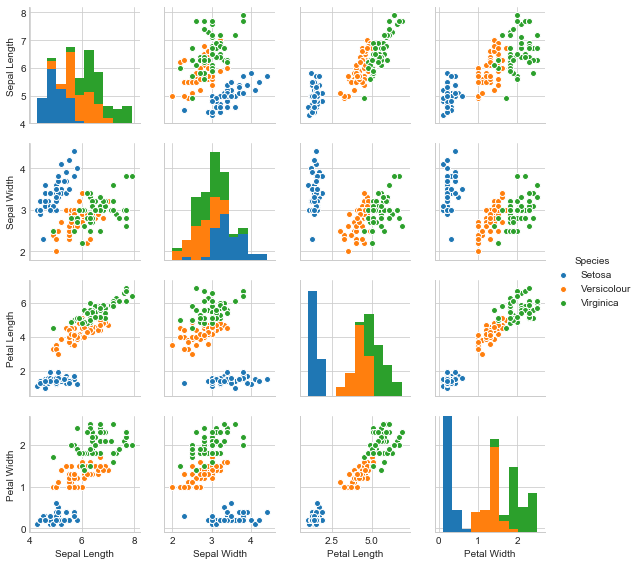

In [19]:
sns.pairplot(iris,hue='Species',size=2)
# bbased on which square are points are we must make are observations
# mek@ vercnum enq vorpes Y, the others as 0 for all
#if it works good for train but dont work properly in ase of test then we have overfitting issue

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)
# then we change test size to 0.3 then our accuracy is 1
#inchqan poqr a train@ enqan poqr a accuracy-n

In [22]:
logreg.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
from sklearn import metrics

In [24]:
Y_pred = logreg.predict(X_test)

In [25]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.9333333333333333


# Ordered Logit

In [28]:
from pandas import read_csv


# K neraest neighobours

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [59]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [60]:
Y_pred = knn.predict(X_test)

In [61]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.95


In [62]:
k_range = range(1,21)
accuracy = []

In [63]:
for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

In [64]:
accuracy

[0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95,
 0.9333333333333333,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9333333333333333,
 0.9333333333333333,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.9666666666666667,
 0.95,
 0.95,
 0.95]

Text(0,0.5,'Tasting accuracy')

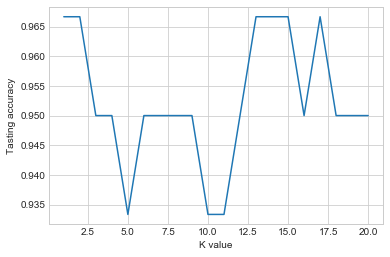

In [65]:
plt.plot(k_range, accuracy)
plt.xlabel("K value")
plt.ylabel("Tasting accuracy")
# we have to pick up K, which gives us the highest accuracy

In [ ]:
#"data envelopment analysis", si used to find productivity in april 19
# april 26 ordered logic and propensity score matching